# Board game analysis - Looking for similarities

To perform the analysis is necessary to import some Py libraries and the dataset as a Pandas Dataframe.
Pandas is a data manipulation library,
Matplotlib is a plotting library,
Seaborn is a visualization library based on matplotlib,
Numpy add support for vectors ,multidimensional matrix and other usefull mathematical functions.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

First of all I've imported the dataset as a pandas dataframe and I started exploring data:

In [16]:
df = pd.read_csv('./bgg_db_2017_04.csv', encoding='latin1')

I analyse the first columns and the information inside in order to find some interesting analysis.

In [17]:
df.head()

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
0,1,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66905,8.48904,18009,https://cf.geekdo-images.com/images/pic2452831...,13,"Action Point Allowance System, Co-operative Pl...",29472,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8076
1,2,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.72977,8.30744,7309,https://cf.geekdo-images.com/images/pic2663291...,14,"Action Point Allowance System, Auction/Bidding...",10007,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3093
2,3,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,180,180,2005,8.35745,8.22021,27403,https://cf.geekdo-images.com/images/pic361592.jpg,13,"Area Control / Area Influence, Campaign / Batt...",37382,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5317
3,4,https://boardgamegeek.com/boardgame/120677/ter...,120677,Terra Mystica,2,5,150,60,150,2012,8.29627,8.15458,24267,https://cf.geekdo-images.com/images/pic1356616...,12,"Route/Network Building, Variable Phase Order, ...",27948,"Civilization, Economic, Fantasy, Territory Bui...","Jens Drögemüller, Helge Ostertag",3.9387
4,5,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,150,90,150,2017,9.08970,8.15151,3978,https://cf.geekdo-images.com/images/pic2437871...,12,"Action / Movement Programming, Campaign / Batt...",6057,"Adventure, Economic, Exploration, Fantasy, Fig...",Isaac Childres,3.7028


In [65]:
total_row = len(df.index)
print(total_row)

4999


# Let's explore the dataset

How many players is most frequent. Here I'm adding two column at the end of dataset: average numbers of players and the players number range (min - max). With this we can wich category is most frequent and look for same easy correlation:

In [18]:
df['avg_players'] = (df['min_players'] + df['max_players']) / 2
df['player_number'] = df['min_players'].astype(str) + '-' + df['max_players'].astype(str)

# Average player histogram:

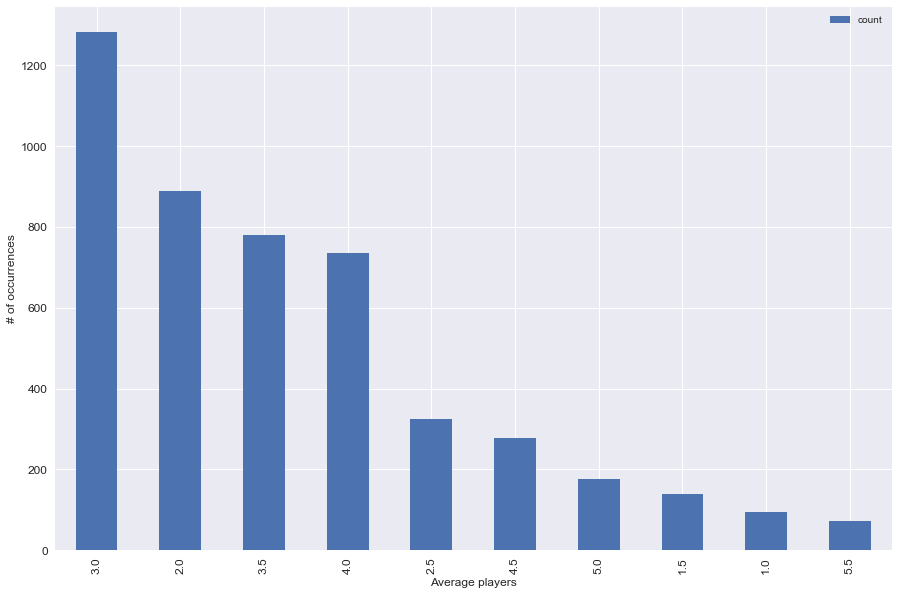

In [136]:
avg_pl=df.groupby(['avg_players']).size().to_frame('count').reset_index()
avg_pl = avg_pl.sort_values(['count'], ascending=[False])
ax = avg_pl[['avg_players','count']].head(10).plot(kind='bar', x=['avg_players'], title ="", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Average players", fontsize=12)
ax.set_ylabel("# of occurrences", fontsize=12)
plt.show()

# Player range histogram:

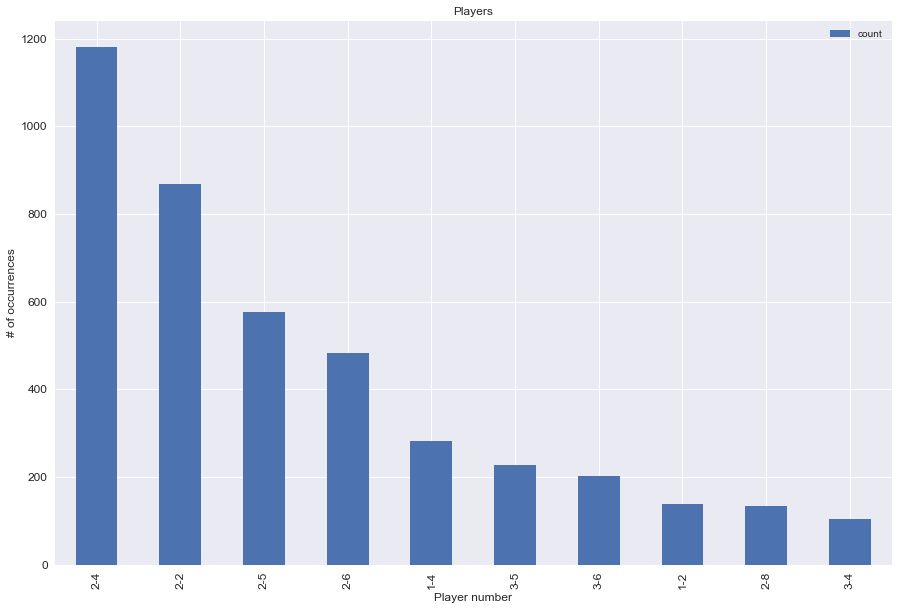

In [139]:
net=df.groupby(['player_number']).size().to_frame('count').reset_index()
net_sorted = net.sort_values(['count'], ascending=[False])
ax = net_sorted[['player_number','count']].head(10).plot(kind='bar', x=['player_number'], title ="Players", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Player number", fontsize=12)
ax.set_ylabel("# of occurrences", fontsize=12)
plt.show()

2-4 is the most common player range followed by 2 players. Let's explore these building separated dataframe for the main five occurrencies:

In [52]:
table_2_4 = df.loc[df['player_number'] == '2-4']
table_2_2 = df.loc[df['player_number'] == '2-2']
table_2_5 = df.loc[df['player_number'] == '2-5']
table_2_6 = df.loc[df['player_number'] == '2-6']
table_1_4 = df.loc[df['player_number'] == '1-4']

And is possible to see wich games are inside the histogram bars:

In [118]:
table_2_4['names'].head()

0                         Pandemic Legacy: Season 1
1     Through the Ages: A New Story of Civilization
5                              Star Wars: Rebellion
10                          The Castles of Burgundy
12                 War of the Ring (Second Edition)
Name: names, dtype: object

The first five column are the most common:

In [70]:
row_sum = len(table_2_4.index)+len(table_2_2.index)+len(table_2_5.index)+len(table_2_6.index)+len(table_1_4.index);
percentage=row_sum/total_row*100
print(percentage)

67.83356671334266


They represent the 68% of the overall data.

# Most common age:

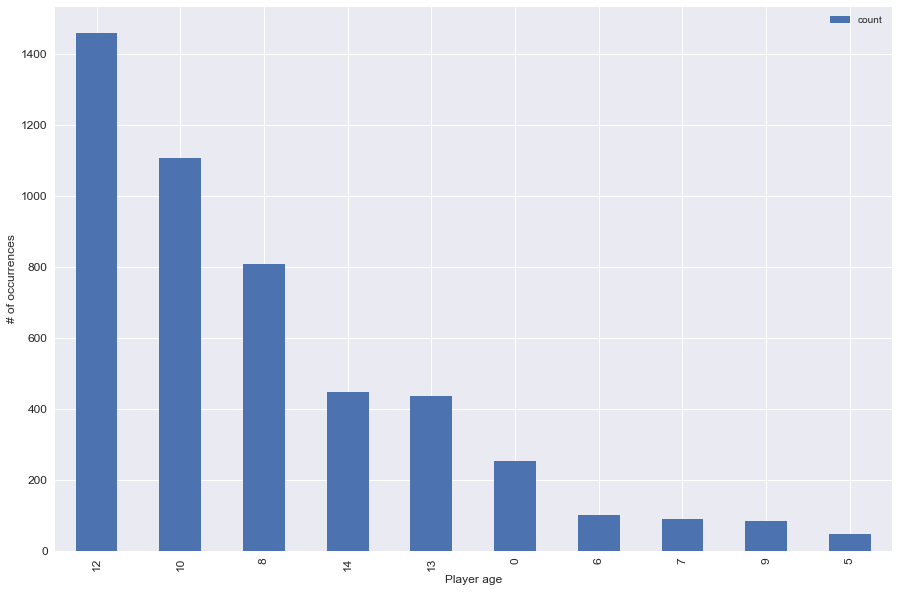

In [111]:
age_count=df.groupby(['age']).size().to_frame('count').reset_index()
age_count = age_count.sort_values(['count'], ascending=[False])
ax = age_count[['age','count']].head(10).plot(kind='bar', x=['age'], title ="", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Player age", fontsize=12)
ax.set_ylabel("# of occurrences", fontsize=12)
plt.show()

Again if we want wich games are inside the bar:

In [117]:
table_age_12 = df.loc[df['age'] == 12]
table_age_12['names'].head()

3                 Terra Mystica
4                    Gloomhaven
7             Terraforming Mars
9     Caverna: The Cave Farmers
10      The Castles of Burgundy
Name: names, dtype: object

# Correlation between age and the complexity of the game (weight):

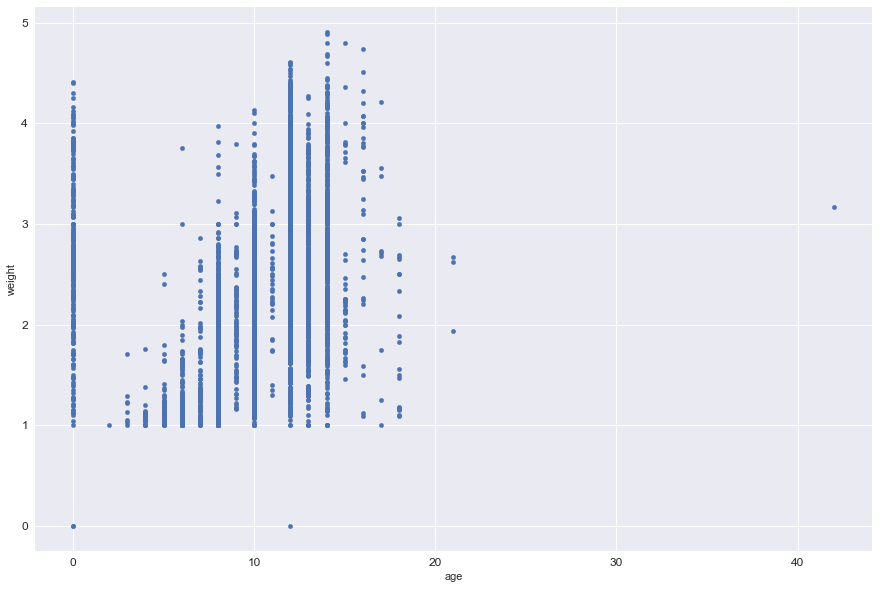

In [113]:
ax = df.plot(kind='scatter', x='age',y='weight', title ="", figsize=(15, 10), legend=True, fontsize=12)

The Pearson correlation is not so strong:

In [121]:
np.corrcoef(df['age'],df['weight'])[0,1]

0.29589483531355137

# Correlation between average rating and weight (how complex the game is):

There is a correlation between complexity and rating? 

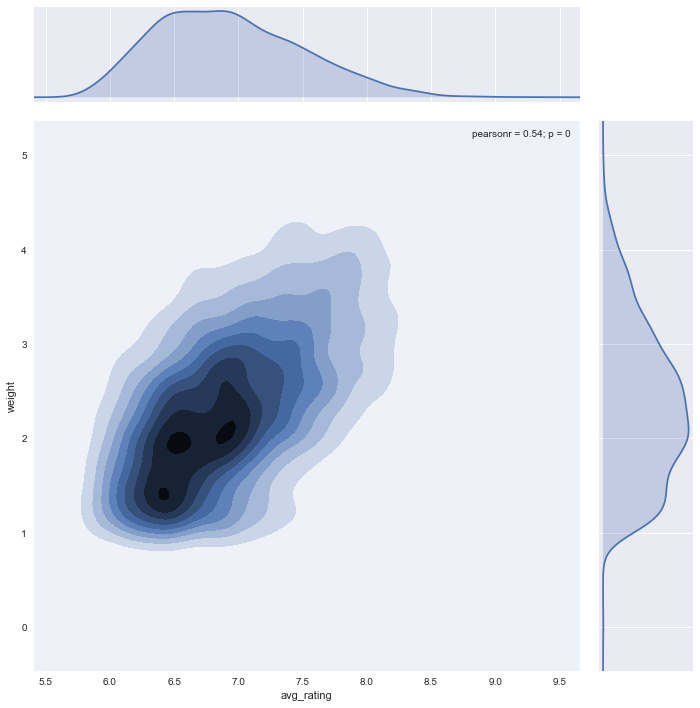

In [92]:
ax = sb.jointplot(x='avg_rating', y='weight',data=df,kind='kde', size=10) 

The pearson correlation coefficient is 0.54 so there is a linear correlation between weight and average rating. If we use Geek rating the correlation crash to 0.19. Why? The reason is the geek rating is the average rating adjusted for the number of votes. If there are only a few votes, it's pulled strongly towards the middle (5.5 is the number used, I think). If there are a lot of votes, the geek rating is closer to the average rating.

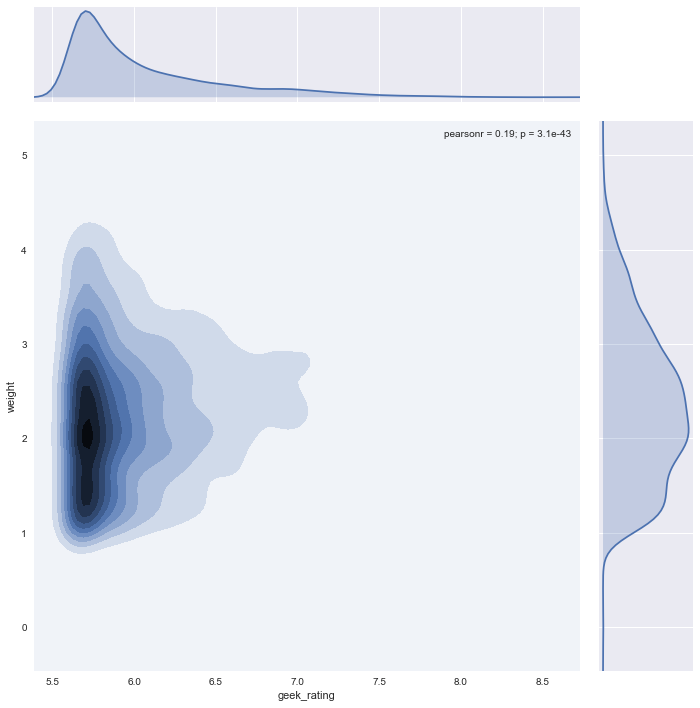

In [93]:
ax = sb.jointplot(x='geek_rating', y='weight',data=df,kind='kde', size=10) 

Now I take only very high number of votes (more than 5000 votes):

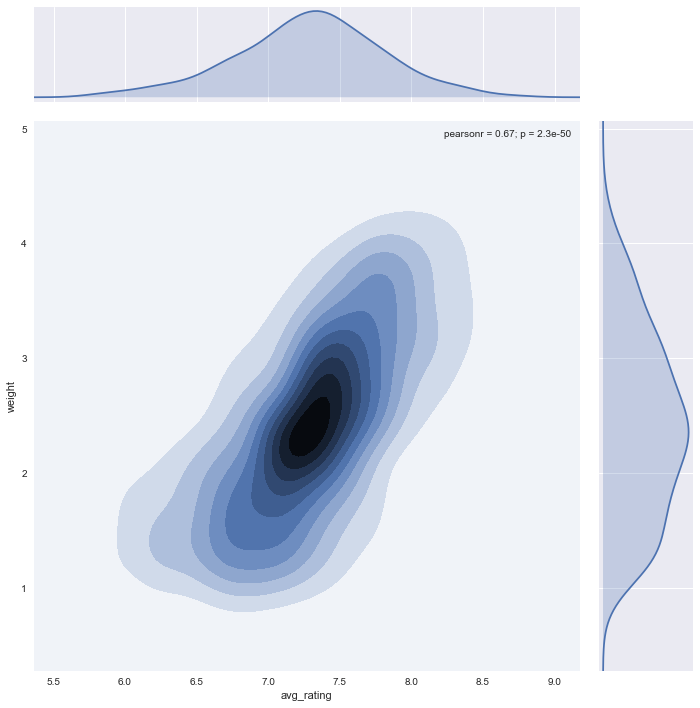

In [106]:
df_stat_sig = df.loc[df['num_votes'] >= 5000]
ax = sb.jointplot(x='avg_rating', y='weight',data=df_stat_sig,kind='kde', size=10) 

In [107]:
len(df_stat_sig)

375

There are only 375 boardgame but the correlation is more clear and high (0.67)

# For a given game which other games are most similar:

In [154]:
data = np.zeros((1,), dtype=[('min_players', 'int'),('max_players', 'int'),('avg_time', 'float')])
data[:] = [(1,2,3)]

my_game = pd.DataFrame(data)


#min_players	max_players	avg_time	min_time	max_time	year	avg_rating	geek_rating	num_votes	image_url	age	mechanic	owned	category	designer	weight

In [155]:
my_game.dtypes

min_players      int32
max_players      int32
avg_time       float64
dtype: object